In [ ]:
"""
Practice and explore networkx with speaker_word [topic_word]

nodes: all speakers + all words (after cleaning, no stop words/boring words, etc)

edges: 

"""

In [2]:
import re, itertools
import networkx as nx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

from gensim import matutils, models
import scipy.sparse

%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/katiehuang/Desktop/metis/projects/onl_ds5_project_4/py')
from word_cloud import *
import importlib

In [4]:
topic_df = pd.read_pickle('../dump/topic_df')
speech_df = pd.read_pickle('../dump/speech_clean_lemma')
topic_word = pd.read_pickle('../dump/to_nx_topic_words')

In [5]:
speech_df

,speaker,year,transcript,length
0,SIDDHARTHA MUKHERJEE,2018,i wish someone have tell me at my own commence...,14487
1,ABBY WAMBACK,2018,failure be not something to be ashamed of its ...,15866
2,JON B. FISHER,2018,thank you very much my father commencement spe...,8544
3,MINDY KALING,2018,good morning to the class of the faculty the p...,15391
4,JESMYN WARD,2018,persist be patient be well good morning it be ...,14063
...,...,...,...,...
436,CARRIE CHAPMAN,1936,i bring a message to sweet briar college and e...,22942
437,FRANKLIN D ROOSEVELT,1932,for me as for you this be a day of honorable a...,16017
438,OPRAH WINFREY,1918,thank you wallis annenberg and a special thank...,15301
439,RALPH WALDO,1838,in this refulgent summer it have be a luxury t...,40403


In [6]:
topic_word

,Topic #01,Topic #02,Topic #03,Topic #04,advice,career,company,country,course,dream,...,place,president,question,sense,state,success,university,women,word,year
Topic #01,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
Topic #02,0,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,1,1
Topic #03,0,0,0,0,0,0,1,0,1,1,...,0,0,1,0,1,0,1,1,0,1
Topic #04,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,1,1,1,1,0
advice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
career,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
company,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
country,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
course,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dream,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import pickle

with open("../dump/common_words.txt", "rb") as f:   # Unpickling
    common_words = pickle.load(f)

In [8]:
# Bag of words with CountVectorizer
# add_stop_words selected from after lemmatization
# will also remove common_words (most commonly used words in all speeches)
# will also remove boring words (words that do not add much insight to topic modeling)
add_stop_words = ['like','youre','ive','im','really','id','ve','just','dont','thi','wa',
                  'say','know','make','people']

boring_words = ['say','like','just','dont','don','im',
                  'ive','youll','youve','things','thing','youre','right','really','lot',
                  'make','know','people','way','day','class']


add_stop_words = add_stop_words + common_words + boring_words

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(speech_df.transcript)

In [9]:
# If add_stop_words is modified, update tdm
data_dtm = cv_dtm(speech_df,'transcript',add_stop_words)
tdm = data_dtm.transpose()

In [10]:
data_dtm

,aa,aahhhh,aaron,aback,abalthus,abandon,abandonment,abate,abbot,abbreviation,...,ômay,ôsobriety,ôtell,ôthe,ôwe,ôwhat,ôyou,ôyouõre,über,我是一只迷途的羔羊谁能引我走出迷茫哪有我重生的希望噢牧羊人啊噢牧羊人啊
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
speech_df.transcript

0      i wish someone have tell me at my own commence...
1      failure be not something to be ashamed of its ...
2      thank you very much my father commencement spe...
3      good morning to the class of the faculty the p...
4      persist be patient be well good morning it be ...
                             ...                        
436    i bring a message to sweet briar college and e...
437    for me as for you this be a day of honorable a...
438    thank you wallis annenberg and a special thank...
439    in this refulgent summer it have be a luxury t...
440    its an honor to be with so many smart people a...
Name: transcript, Length: 441, dtype: object

In [12]:
def corpus_remove_stop_words(transcript):
    
    add_stop_words = ['like','youre','ive','im','really','id','ve','just','dont','thi','wa',
                  'say','know','make','people']

    boring_words = ['say','like','just','dont','don','im',
                      'ive','youll','youve','things','thing','youre','right','really','lot',
                      'make','know','people','way','day','class']


    add_stop_words = add_stop_words + common_words + boring_words

    stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

    words = transcript.split(" ")
    new_words = [x for x in words if x not in stop_words]
    new_transcript = " ".join(new_words)
    return new_transcript

In [13]:
len(corpus_remove_stop_words(speech_df.transcript.iloc[0])),len(speech_df.transcript.iloc[0])

(6829, 13441)

In [14]:
test_df = speech_df.iloc[:5]
test_df

,speaker,year,transcript,length
0,SIDDHARTHA MUKHERJEE,2018,i wish someone have tell me at my own commence...,14487
1,ABBY WAMBACK,2018,failure be not something to be ashamed of its ...,15866
2,JON B. FISHER,2018,thank you very much my father commencement spe...,8544
3,MINDY KALING,2018,good morning to the class of the faculty the p...,15391
4,JESMYN WARD,2018,persist be patient be well good morning it be ...,14063


In [15]:
test_df.transcript.apply(corpus_remove_stop_words)

0    wish commencement requirement graduation emerg...
1    failure ashamed power failure highest octane f...
2    thank father commencement speaker martin luthe...
3    morning faculty parent grandparents fellow hon...
4    persist patient morning honor pleasure share m...
Name: transcript, dtype: object

In [ ]:
# pd.DataFrame(test_df.transcript.apply(corpus_remove_stop_words)).to_pickle('../dump2/test_df')

In [ ]:
# pd.DataFrame(test_df.transcript.apply(corpus_remove_stop_words)).to_csv('../dump2/test_df.csv')

In [ ]:
# This is the one for textnet R!!
speech_df.iloc[:50].to_csv('../dump2/test_df.csv')

In [ ]:
speech_df.iloc[:50].speaker.nunique()

### Play with the matrix of smaller speech_df

In [ ]:
"""
nodes: speakers

edges: when they use one same word 

        --> prune: keep only E()>= threshold


"""

In [17]:
num_rows = 30
df = pd.DataFrame(speech_df['transcript'].iloc[:num_rows])
df.index = speech_df.speaker.tolist()[:num_rows]
# df

In [18]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
speaker_word = cv_dtm(df,'transcript',add_stop_words=[])
# speaker_word

In [20]:
# Prepare nodes
node_list = list(df.index)
# node_list

In [21]:
# Prepare edges
from collections import defaultdict
speaker_word_assoc = defaultdict(lambda: 0)

relationships = itertools.combinations(node_list,2) 

for relationship in relationships:
#     print(relationship[0])
#     print(relationship[1])
    for word in speaker_word.columns:
        if (speaker_word.loc[relationship[0],word] != 0) & \
           (speaker_word.loc[relationship[1],word] != 0):
                speaker_word_assoc[relationship] += 1
                
min_edge = min(speaker_word_assoc.values())
max_edge = max(speaker_word_assoc.values())

alpha = 0.2

for key, value in speaker_word_assoc.items():
    if value/max_edge > alpha:
        speaker_word_assoc[key] = value/max_edge
    else:
        speaker_word_assoc[key] = 0

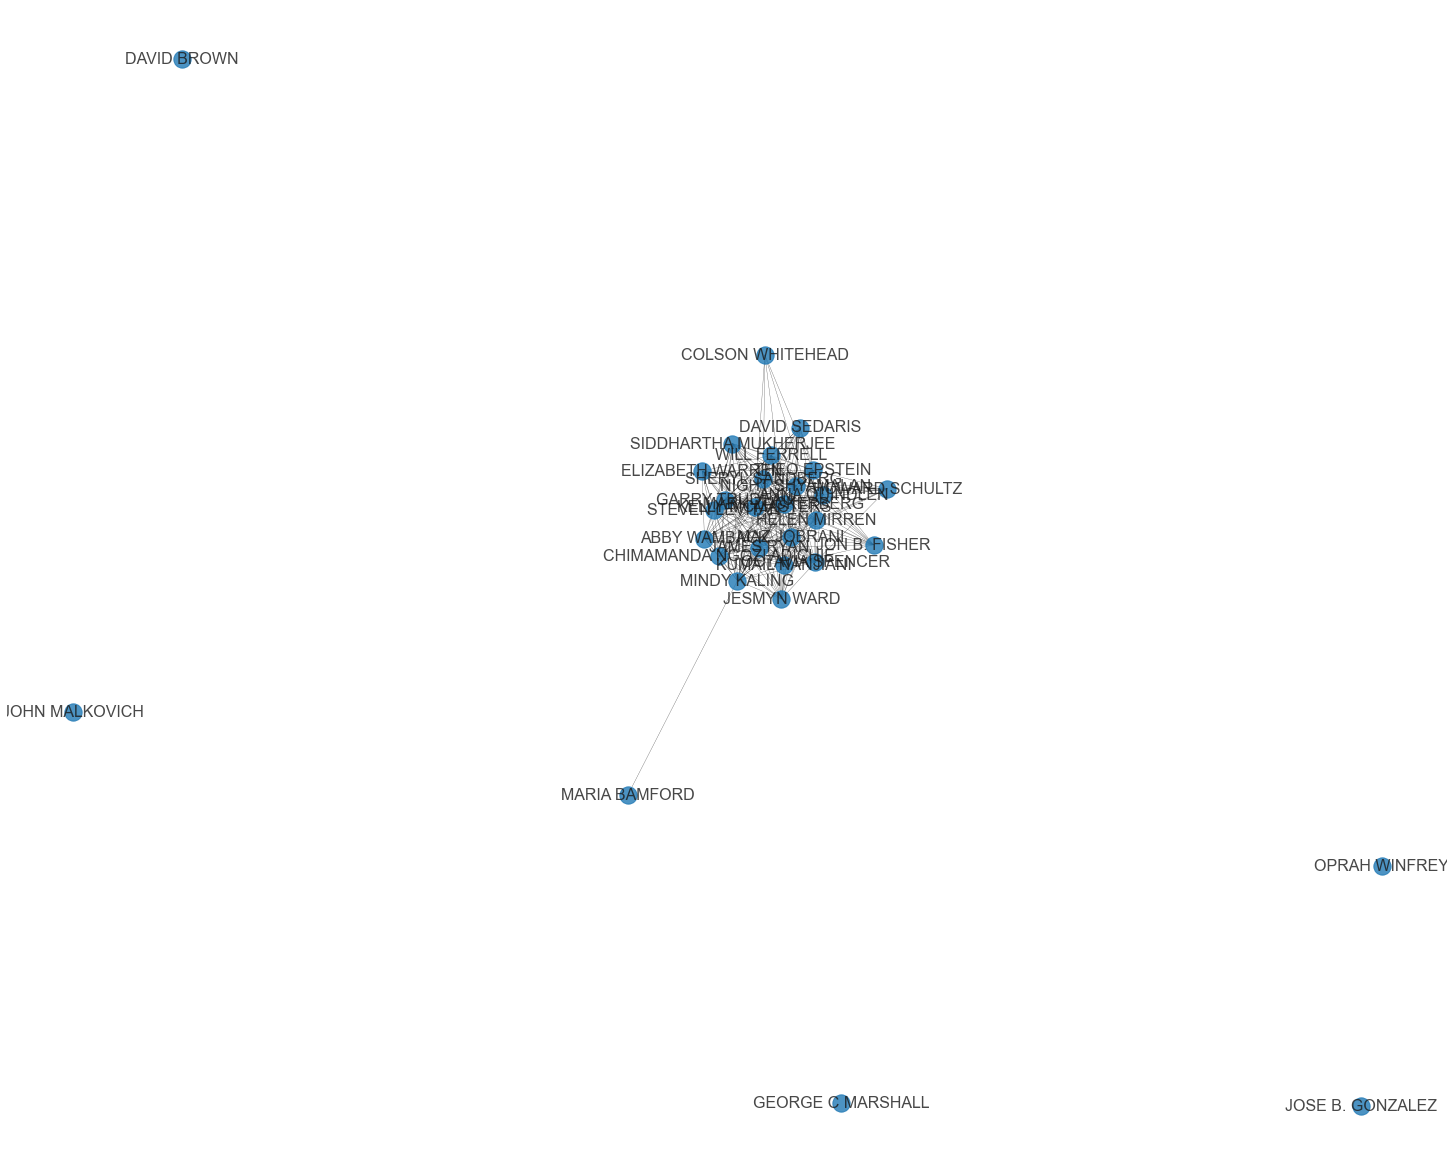

In [22]:
G = nx.Graph()

# Create nodes and edges
for node in node_list:
    G.add_node(node)
for edge, weight in speaker_word_assoc.items():
    if weight != 0:
        G.add_edge(edge[0], edge[1], weight=weight)
        
# Draw
plt.rcParams['figure.figsize'] = [20, 16]
pos = nx.spring_layout(G, iterations=20, scale=2, k=0.1)             # position of nodes
nx.draw(G, pos, with_labels=True, font_size=16,                         # node label
#             node_color=node_label, cmap='Pastel1',                          # node colorr
#             nodelist = node_list, node_size=[v*6000 for v in node_label],  # mode size
            width=.3, alpha=0.8,                                            # edge width and transparency
            )

In [23]:


# Add attribute ('type') for node color
for n, d in list(G.nodes(data=True))[:num_topic]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[num_topic:]:
    G.nodes[n]['type'] = 'word'

# Assign values to 'type' (if want to use 'type' as node size partition)
types = ['topic','word']
mapping = {'topic':5, 'word':0.5}
nodes = G.nodes()
node_label = [mapping[G.nodes[n]['type']] for n in nodes]

# Draw
plt.rcParams['figure.figsize'] = [20, 16]
pos = nx.spring_layout(G, iterations=20, scale=2, k=0.1)             # position of nodes
#     nx.draw(G, pos, with_labels=True, font_size=16,                         # node label
#             node_color=node_label, cmap='Pastel1',                          # node colorr
#             nodelist = node_list, node_size=[v*6000 for v in node_label],  # mode size
#             width=.5, alpha=1,                                            # edge width and transparency
#             )

# Memorize the node positions from basic plot
pos_want = pos

NameError: name 'num_topic' is not defined

In [ ]:
# Prepare nodes
node_list = list(topic_word.columns)

# Prepare edges
topic_word_assoc = {}

relationships = itertools.combinations(node_list,2) 
for relationship in relationships:
    topic_word_assoc[relationship] = topic_word.loc[relationship[0],relationship[1]]

# Basic plot for pos_want   FOR TOPIC_DF_1
# Create networkx graph

G = nx.Graph()

# Create nodes and edges
for node in node_list:
    G.add_node(node)
for edge, weight in topic_word_assoc.items():
    if weight != 0:
        G.add_edge(edge[0], edge[1], weight=weight)

# Add attribute ('type') for node color
for n, d in list(G.nodes(data=True))[:num_topic]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[num_topic:]:
    G.nodes[n]['type'] = 'word'

# Assign values to 'type' (if want to use 'type' as node size partition)
types = ['topic','word']
mapping = {'topic':5, 'word':0.5}
nodes = G.nodes()
node_label = [mapping[G.nodes[n]['type']] for n in nodes]

# Draw
plt.rcParams['figure.figsize'] = [20, 16]
pos = nx.spring_layout(G, iterations=20, scale=2, k=0.1)             # position of nodes
#     nx.draw(G, pos, with_labels=True, font_size=16,                         # node label
#             node_color=node_label, cmap='Pastel1',                          # node colorr
#             nodelist = node_list, node_size=[v*6000 for v in node_label],  # mode size
#             width=.5, alpha=1,                                            # edge width and transparency
#             )

# Memorize the node positions from basic plot
pos_want = pos